# Tutorial 00

## sn ratio visualization

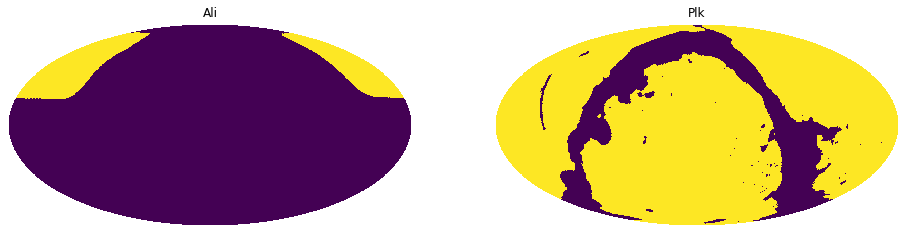

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import afra as af
from afra.tools.ps_estimator import pstimator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

NSIDE = 128
NPIX = 12*NSIDE**2
PSBIN = 40
APOSCALE = 6.
LMIN = 40
LMAX = 200

cmb_cl = hp.read_cl('./data/camb_cls.fits')
mapcmb = hp.synfast(cmb_cl,nside=NSIDE,new=True,verbose=0)
map353 = hp.read_map('./data/pysm_s1d1_353.fits',field=[0,1,2],dtype=np.float32,verbose=0)+mapcmb
vmap353 = hp.read_map('./data/plkvar_353.fits',field=[0,1,2],dtype=np.float32,verbose=0)
nmap353 = np.random.normal(0.,1.,size=(3,vmap353.shape[1]))*np.sqrt(vmap353)

alimask = hp.read_map('./data/ali_mask.fits',dtype=bool,verbose=False)
plkmask = hp.read_map('./data/plk_mask.fits',dtype=bool,verbose=False)

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
hp.mollview(alimask,hold=True,cbar=0,title='Ali')

ax2 = fig.add_subplot(122)
hp.mollview(plkmask,hold=True,cbar=0,title='Plk')

In [2]:
aliest = pstimator(nside=NSIDE,mask=alimask,aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,targets='EB')
ali353eb = aliest.autoBP(map353)
ali353neb = aliest.autoBP(nmap353)

plkest = pstimator(nside=NSIDE,mask=plkmask,aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,targets='EB')
plk353eb = plkest.autoBP(map353)
plk353neb = plkest.autoBP(nmap353)

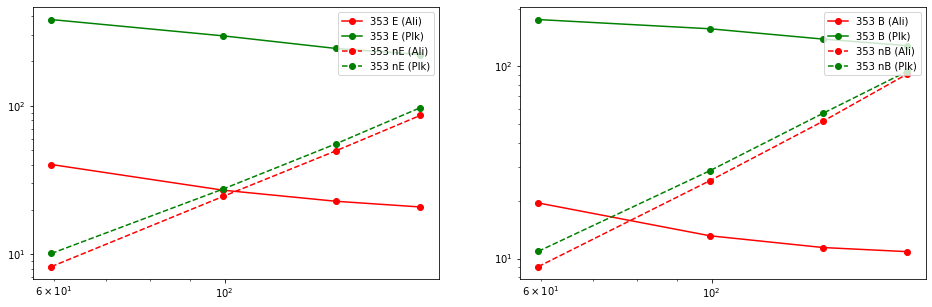

In [3]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
ax1.plot(ali353eb[0],ali353eb[1],'r-',marker='o',label='353 E (Ali)')
ax1.plot(plk353eb[0],plk353eb[1],'g-',marker='o',label='353 E (Plk)')
ax1.plot(ali353neb[0],ali353neb[1],'r--',marker='o',label='353 nE (Ali)')
ax1.plot(plk353neb[0],plk353neb[1],'g--',marker='o',label='353 nE (Plk)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc=1)

ax2 = fig.add_subplot(122)
ax2.plot(ali353eb[0],ali353eb[2],'r-',marker='o',label='353 B (Ali)')
ax2.plot(plk353eb[0],plk353eb[2],'g-',marker='o',label='353 B (Plk)')
ax2.plot(ali353neb[0],ali353neb[2],'r--',marker='o',label='353 nB (Ali)')
ax2.plot(plk353neb[0],plk353neb[2],'g--',marker='o',label='353 nB (Plk)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc=1)

In [4]:
map95 = hp.read_map('./data/pysm_s1d1_95.fits',field=[0,1,2],dtype=np.float32,verbose=0)+mapcmb
vmap95 = hp.read_map('./data/alivar_95.fits',field=[0,1,2],dtype=np.float32,verbose=0)
nmap95 = np.random.normal(0.,1.,size=(3,vmap95.shape[1]))*np.sqrt(vmap95)

In [5]:
aliest = pstimator(nside=NSIDE,mask=alimask,aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,targets='EB')
ali95eb = aliest.autoBP(map95)
ali95neb = aliest.autoBP(nmap95)

plkest = pstimator(nside=NSIDE,mask=plkmask,aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,targets='EB')
plk95eb = plkest.autoBP(map95)
plk95neb = plkest.autoBP(nmap95)

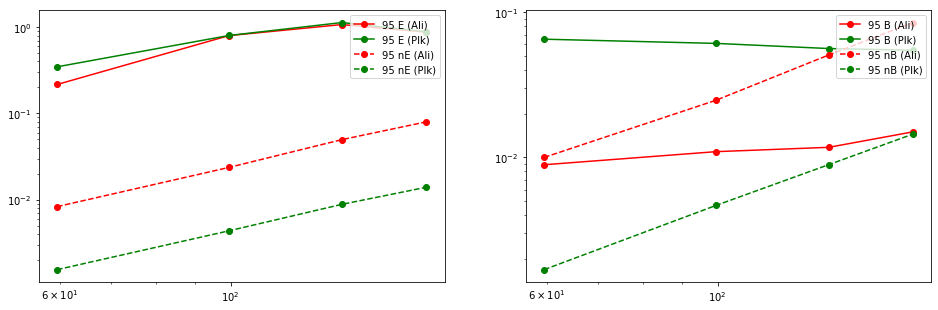

In [6]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
ax1.plot(ali95eb[0],ali95eb[1],'r-',marker='o',label='95 E (Ali)')
ax1.plot(plk95eb[0],plk95eb[1],'g-',marker='o',label='95 E (Plk)')
ax1.plot(ali95neb[0],ali95neb[1],'r--',marker='o',label='95 nE (Ali)')
ax1.plot(plk95neb[0],plk95neb[1],'g--',marker='o',label='95 nE (Plk)')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc=1)

ax2 = fig.add_subplot(122)
ax2.plot(ali95eb[0],ali95eb[2],'r-',marker='o',label='95 B (Ali)')
ax2.plot(plk95eb[0],plk95eb[2],'g-',marker='o',label='95 B (Plk)')
ax2.plot(ali95neb[0],ali95neb[2],'r--',marker='o',label='95 nB (Ali)')
ax2.plot(plk95neb[0],plk95neb[2],'g--',marker='o',label='95 nB (Plk)')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc=1)

end